<a href="https://kritikseth.github.io/redirect" target="_parent"><img src="https://raw.githack.com/kritikseth/kritikseth/master/redirect.svg" alt="Kritik Seth"/></a>

In [ ]:
import pandas as pd
import numpy as np

import re

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Capstone/fps_videogames.csv')

In [ ]:
rename = {'CpuName': 'CPU Name', 'CpuNumberOfCores': 'CPU Cores', 'CpuNumberOfThreads': 'CPU Threads',
          'CpuBaseClock': 'CPU Base Clock', 'CpuCacheL1': 'CPU Cache L1', 'CpuCacheL2': 'CPU Cache L2',
          'CpuCacheL3': 'CPU Cache L3', 'CpuDieSize': 'CPU Die Size', 'CpuFrequency': 'CPU Frequency',
          'CpuMultiplier': 'CPU Multiplier', 'CpuMultiplierUnlocked': 'CPU Multiplier Unlocked',
          'CpuProcessSize': 'CPU Process Size', 'CpuTDP': 'CPU TDP', 'CpuNumberOfTransistors': 'CPU Transistors',
          'CpuTurboClock': 'CPU Turbo Clock',
          'GpuName': 'GPU Name', 'GpuArchitecture': 'GPU Architecture', 'GpuBandwidth': 'GPU Bandwidth',
          'GpuBaseClock': 'GPU Base Clock', 'GpuBoostClock': 'GPU Boost Clock', '\'GpuBus': 'GPU Bus',
          'GpuNumberOfComputeUnits': 'GPU Compute Units', 'GpuDieSize': 'GPU Die Size', 'GpuDirectX': 'GPU Direct X',
          'GpuNumberOfExecutionUnits': 'GPU Execution Units', 'GpuFP32Performance': 'GPU FP32 Performance',
          'GpuMemoryBus': 'GPU Memory Bus', 'GpuMemorySize': 'GPU Memory Size', 'GpuMemoryType': 'GPU Memory Type',
          'GpuOpenCL': 'GPU Open CL', 'GpuOpenGL': 'GPU Open GL', 'GpuPixelRate': 'GPU Pixel Rate', 'GpuProcessSize': 'GPU Process Size',
          'GpuNumberOfROPs': 'GPU Number of ROPs', 'GpuShaderModel': 'GPU Shader Model', 'GpuNumberOfShadingUnits': 'GPU Shading Units',
          'GpuNumberOfTMUs': 'GPU TMUs', 'GpuTextureRate': 'GPU Texture Rate', 'GpuNumberOfTransistors': 'GPU Transistors', 'GpuVulkan': 'GPU Vulkan',
          'GameName': 'Game', 'GameResolution': 'Game Resolution', 'GameSetting': 'Game Settings'}

df.rename(columns=rename, inplace=True)

df['CPU Name'] = df['CPU Name'].apply(lambda x: x.replace('-', ' '))
df['CPU Brand'] = df['CPU Name'].apply(lambda x: x.split(' ')[0])

df['CPU Type'] = df['CPU Name'].apply(lambda x: re.findall('[a-zA-Z]+', x)[-1].upper() if x[-1].isalpha() else 'Normal')
df['CPU Name'] = df['CPU Name'].apply(lambda x: x.replace(re.findall('[a-zA-Z]+', x)[-1], '', -1).strip() if x[-1].isalpha() else x)

df['CPU Model'] = df['CPU Name']
df['CPU Model'] = df.apply(lambda x : x['CPU Model'].replace(str(x['CPU Brand']), '').strip(), axis=1)

cpu_series = ['A4', 'A6', 'Athlon', 'Athlon 64', 'Athlon II', 'FX', 'Ryzen', 'Core', 'Pentium']

for series in cpu_series:
    df['CPU Series Temp'] = df['CPU Model'].apply(lambda x: series if series in x else 'NA')
    ind = df[df['CPU Series Temp']==series].index
    df.loc[ind, 'CPU Series'] = df.loc[ind, 'CPU Series Temp']

df['CPU Model'] = df.apply(lambda x : x['CPU Model'].replace(str(x['CPU Series']), '').strip(), axis=1)
df.drop(['CPU Series Temp'], axis=1, inplace=True)

df['CPU Generation'] = df['CPU Model'].apply(lambda x: x.split(' ')[-1][1] if x.split(' ')[-1][0].isalpha() else x.split(' ')[-1][0]).tolist()

core_ind = df[df['CPU Series']=='Core'].index

df.loc[core_ind, 'CPU Generation'] = df.loc[core_ind, 'CPU Model'].apply(lambda x: x.split(' ')[-1][0]+'0' if len(x.split(' ')[-1])==3 else x.split(' ')[-1][0])
older_gen = {'90': 1, '80': 0, '70': -1, '60': -2, '50': -3, '40': -4, '(': None}
df['CPU Generation'] = df['CPU Generation'].replace(older_gen)

df['CPU Model'] = df.apply(lambda x : x['CPU Model'].replace(str(x['CPU Model'].split(' ')[-1]), '').strip(), axis=1)

df['CPU Model'] = df['CPU Model'].fillna('NA')
df['CPU Series'] = df['CPU Series'].fillna('NA')
df.replace({'?': None}, inplace=True)

df['GPU Transistors'] = df['GPU Transistors'].astype(float)
df['CPU Transistors'] = df['CPU Transistors'].astype(float)

df['GPU Die Size'] = df['GPU Die Size'].astype(float)
df['CPU Die Size'] = df['CPU Die Size'].astype(float)

In [ ]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [ ]:
df.head()

id            CPU Name  CPU Cores  CPU Threads  CPU Base Clock  \
0   1   Intel Core i7 920          4            8             133   
1   2   Intel Core i7 920          4            8             133   
2   3  Intel Core i5 4690          4            4             100   
3   4  Intel Core i5 4690          4            4             100   
4   5  Intel Core i5 4690          4            4             100   

   CPU Cache L1  CPU Cache L2 CPU Cache L3  CPU Die Size  CPU Frequency  ...  \
0           256          1024            8      0.000263           2666  ...   
1           256          1024            8      0.000263           2666  ...   
2           256          1024            6      0.000177           3400  ...   
3           256          1024            6      0.000177           3400  ...   
4           256          1024            6      0.000177           3400  ...   

                           Game  Game Resolution  Game Settings  \
0  counterStrikeGlobalOffensive             1080            low   
1  counterStrikeGlobalOffensive             1080            low   
2  counterStrikeGlobalOffensive             1080            low   
3  counterStrikeGlobalOffensive             1080            low   
4  counterStrikeGlobalOffensive             1080            low   

         Dataset    FPS  CPU Brand CPU Type CPU Model CPU Series  \
0  userbenchmark   70.0      Intel   Normal        i7       Core   
1  userbenchmark  230.0      Intel   Normal        i7       Core   
2  userbenchmark  250.0      Intel   Normal        i5       Core   
3  userbenchmark  300.0      Intel   Normal        i5       Core   
4  userbenchmark  200.0      Intel   Normal        i5       Core   

   CPU Generation  
0               1  
1               1  
2               4  
3               4  
4               4  

[5 rows x 51 columns]

In [ ]:
missing_values_table(df)

Your selected dataframe has 51 columns.
There are 17 columns that have missing values.


Missing Values  % of Total Values
GPU Execution Units           412935               97.0
GPU Compute Units             357107               83.9
CPU Transistors               226039               53.1
CPU Die Size                  202534               47.6
GPU Memory Bus                 15441                3.6
GPU Bandwidth                  15441                3.6
GPU Memory Size                15441                3.6
GPU Memory Type                15441                3.6
GPU Transistors                11539                2.7
GPU Vulkan                     11525                2.7
GPU Die Size                   11196                2.6
CPU Cache L3                    5055                1.2
GPU Open CL                      177                0.0
GPU Shading Units                 56                0.0
GPU FP32 Performance              56                0.0
GPU Shader Model                   5                0.0
CPU Generation                     3                0.0

In [ ]:
gpu1 = df[['GPU Process Size', 'GPU Transistors', 'GPU Die Size']]
gpu1.dropna(inplace=True)
cpu1 = df[['CPU Process Size', 'CPU Transistors', 'CPU Die Size']]
cpu1.dropna(inplace=True)

In [ ]:
fig = go.Figure(data=[go.Scatter3d(
    x=cpu1['CPU Process Size'], y=cpu1['CPU Transistors'], z=cpu1['CPU Die Size'],
    mode='markers',
    marker=dict(
        size=cpu1['CPU Transistors'].apply(lambda x: x*0.006),
        color=cpu1['CPU Process Size'],
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(title='(CPU) Process Size vs Die Size vs Transistors',
                  autosize=False,
                  width=800,
                  height=800,
                  scene = dict(
                      xaxis_title='Process Size',
                      yaxis_title='Transistors',
                      zaxis_title='Die Size'))
fig.show()

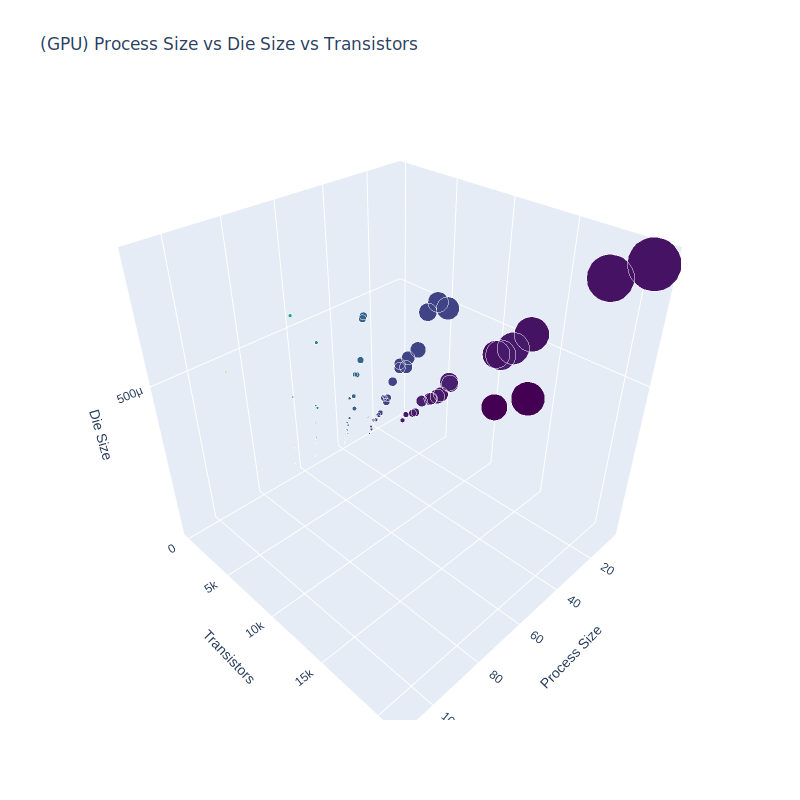

In [ ]:
fig = go.Figure(data=[go.Scatter3d(
    x=gpu1['GPU Process Size'], y=gpu1['GPU Transistors'], z=gpu1['GPU Die Size'],
    mode='markers',
    marker=dict(
        size=gpu1['GPU Transistors'].apply(lambda x: x*0.003),
        color=gpu1['GPU Process Size'],
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(title='(GPU) Process Size vs Die Size vs Transistors',
                  autosize=False,
                  width=800,
                  height=800,
                  scene = dict(
                      xaxis_title='Process Size',
                      yaxis_title='Transistors',
                      zaxis_title='Die Size'))
fig.show('svg')

In [ ]:
cpu2 = df[['CPU Brand', 'CPU Series', 'CPU Model', 'CPU Generation', 'CPU Type']]
cpu2['Count'] = 1

fig = px.sunburst(cpu2, path=['CPU Brand', 'CPU Series', 'CPU Model'], values='Count', title='Pie Chart of CPUs in our dataset',
            color='CPU Brand', color_continuous_scale='Viridis', color_continuous_midpoint=5)
fig.show()

In [ ]:
game = df[['Game', 'Game Resolution', 'Game Settings']]
game['Count'] = 1

game_count = game.groupby(['Game']).agg('count').reset_index().drop_duplicates()
fig = px.bar(game_count, x='Game', y='Count')
fig.show()

In [ ]:
game = df[['Game', 'Game Resolution', 'Game Settings']]
game['Count'] = 1

game_reso = game.groupby(['Game Resolution']).agg('count').reset_index().drop_duplicates()
fig = px.bar(game_reso, x='Game Resolution', y='Count')
fig.show()

In [ ]:
game = df[['Game', 'Game Resolution', 'Game Settings']]
game['Count'] = 1

game_sett = game.groupby(['Game Settings']).agg('count').reset_index().drop_duplicates()
fig = px.bar(game_sett, x='Game Settings', y='Count')
fig.show()

In [ ]:
corr = df.corr()

fig = go.Figure(data=go.Heatmap(z=corr, x=corr.columns, y=corr.columns,
                                xgap=1, ygap=1, colorscale='Viridis'),
                layout=go.Layout(title_text='Correlation Plot', height=1000,
                                 yaxis_autorange='reversed'))

fig.show()

In [ ]:
## Data Loading and Cleaning
df = pd.read_csv('/content/gdrive/MyDrive/Capstone/fps_videogames.csv')
rename = {'CpuName': 'CPU Name', 'CpuNumberOfCores': 'CPU Cores', 'CpuNumberOfThreads': 'CPU Threads',
          'CpuBaseClock': 'CPU Base Clock', 'CpuCacheL1': 'CPU Cache L1', 'CpuCacheL2': 'CPU Cache L2',
          'CpuCacheL3': 'CPU Cache L3', 'CpuDieSize': 'CPU Die Size', 'CpuFrequency': 'CPU Frequency',
          'CpuMultiplier': 'CPU Multiplier', 'CpuMultiplierUnlocked': 'CPU Multiplier Unlocked',
          'CpuProcessSize': 'CPU Process Size', 'CpuTDP': 'CPU TDP', 'CpuNumberOfTransistors': 'CPU Transistors',
          'CpuTurboClock': 'CPU Turbo Clock',
          'GpuName': 'GPU Name', 'GpuArchitecture': 'GPU Architecture', 'GpuBandwidth': 'GPU Bandwidth',
          'GpuBaseClock': 'GPU Base Clock', 'GpuBoostClock': 'GPU Boost Clock', '\'GpuBus': 'GPU Bus',
          'GpuNumberOfComputeUnits': 'GPU Compute Units', 'GpuDieSize': 'GPU Die Size', 'GpuDirectX': 'GPU Direct X',
          'GpuNumberOfExecutionUnits': 'GPU Execution Units', 'GpuFP32Performance': 'GPU FP32 Performance',
          'GpuMemoryBus': 'GPU Memory Bus', 'GpuMemorySize': 'GPU Memory Size', 'GpuMemoryType': 'GPU Memory Type',
          'GpuOpenCL': 'GPU Open CL', 'GpuOpenGL': 'GPU Open GL', 'GpuPixelRate': 'GPU Pixel Rate', 'GpuProcessSize': 'GPU Process Size',
          'GpuNumberOfROPs': 'GPU Number of ROPs', 'GpuShaderModel': 'GPU Shader Model', 'GpuNumberOfShadingUnits': 'GPU Shading Units',
          'GpuNumberOfTMUs': 'GPU TMUs', 'GpuTextureRate': 'GPU Texture Rate', 'GpuNumberOfTransistors': 'GPU Transistors', 'GpuVulkan': 'GPU Vulkan',
          'GameName': 'Game', 'GameResolution': 'Game Resolution', 'GameSetting': 'Game Settings'}

df.rename(columns=rename, inplace=True)

df['CPU Name'] = df['CPU Name'].apply(lambda x: x.replace('-', ' '))
df['CPU Brand'] = df['CPU Name'].apply(lambda x: x.split(' ')[0])

df['CPU Type'] = df['CPU Name'].apply(lambda x: re.findall('[a-zA-Z]+', x)[-1].upper() if x[-1].isalpha() else 'Normal')
df['CPU Name'] = df['CPU Name'].apply(lambda x: x.replace(re.findall('[a-zA-Z]+', x)[-1], '', -1).strip() if x[-1].isalpha() else x)

df['CPU Model'] = df['CPU Name']
df['CPU Model'] = df.apply(lambda x : x['CPU Model'].replace(str(x['CPU Brand']), '').strip(), axis=1)

cpu_series = ['A4', 'A6', 'Athlon', 'Athlon 64', 'Athlon II', 'FX', 'Ryzen', 'Core', 'Pentium']

for series in cpu_series:
    df['CPU Series Temp'] = df['CPU Model'].apply(lambda x: series if series in x else 'NA')
    ind = df[df['CPU Series Temp']==series].index
    df.loc[ind, 'CPU Series'] = df.loc[ind, 'CPU Series Temp']

df['CPU Model'] = df.apply(lambda x : x['CPU Model'].replace(str(x['CPU Series']), '').strip(), axis=1)
df.drop(['CPU Series Temp'], axis=1, inplace=True)

df['CPU Generation'] = df['CPU Model'].apply(lambda x: x.split(' ')[-1][1] if x.split(' ')[-1][0].isalpha() else x.split(' ')[-1][0]).tolist()

core_ind = df[df['CPU Series']=='Core'].index

df.loc[core_ind, 'CPU Generation'] = df.loc[core_ind, 'CPU Model'].apply(lambda x: x.split(' ')[-1][0]+'0' if len(x.split(' ')[-1])==3 else x.split(' ')[-1][0])
older_gen = {'90': 1, '80': 0, '70': -1, '60': -2, '50': -3, '40': -4, '(': None}
df['CPU Generation'] = df['CPU Generation'].replace(older_gen)

df['CPU Model'] = df.apply(lambda x : x['CPU Model'].replace(str(x['CPU Model'].split(' ')[-1]), '').strip(), axis=1)

df['CPU Model'] = df['CPU Model'].fillna('NA')
df['CPU Series'] = df['CPU Series'].fillna('NA')
df.replace({'?': None}, inplace=True)

df['GPU Transistors'] = df['GPU Transistors'].astype(float)
df['CPU Transistors'] = df['CPU Transistors'].astype(float)

df['GPU Die Size'] = df['GPU Die Size'].astype(float)
df['CPU Die Size'] = df['CPU Die Size'].astype(float)
cpu_cols = ['CPU Name', 'CPU Brand', 'CPU Model', 'CPU Series', 'CPU Generation', 'CPU Type', 'CPU Cores', 'CPU Threads',
            'CPU Base Clock', 'CPU Cache L1', 'CPU Cache L2', 'CPU Cache L3', 'CPU Die Size','CPU Frequency', 'CPU Multiplier',
            'CPU Multiplier Unlocked', 'CPU Process Size', 'CPU TDP', 'CPU Transistors', 'CPU Turbo Clock']

cpu_detail_cols = ['CPU Brand', 'CPU Model', 'CPU Series', 'CPU Generation']

gpu_cols = ['GPU Name', 'GPU Architecture', 'GPU Bandwidth', 'GPU Base Clock', 'GPU Boost Clock', 'GPU Bus', 'GPU Compute Units',
            'GPU Die Size', 'GPU Direct X', 'GPU Execution Units', 'GPU FP32 Performance', 'GPU Memory Bus', 'GPU Memory Size',
            'GPU Memory Type', 'GPU Open CL', 'GPU Open GL', 'GPU Pixel Rate', 'GPU Process Size', 'GPU Number of ROPs', 'GPU Shader Model',
            'GPU Shading Units', 'GPU TMUs', 'GPU Texture Rate', 'GPU Transistors', 'GPU Vulkan']

gpu_detail_cols = ['GPU Brand', 'GPU Model', 'GPU Series', 'GPU Generation']


cpu = df[cpu_cols]
gpu = df[gpu_cols]
# gpu['GPU Name Temp'] = gpu['GPU Name']
# gpu['GPU Brand'] = gpu['GPU Name Temp'].apply(lambda x: x.split(' ')[0])
# gpu['GPU Name Temp'] = gpu['GPU Name Temp'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# gpu['GPU Model'] = gpu['GPU Name Temp'].apply(lambda x: x.split(' ')[0])
# gpu['GPU Name Temp'] = gpu['GPU Name Temp'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# gpu['GPU Series'] = gpu['GPU Name Temp'].apply(lambda x: x.split(' ')[0])
# gpu['GPU Name Temp'] = gpu['GPU Name Temp'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# gpu['GPU Generation'] = gpu['GPU Name Temp'].apply(lambda x: x.split(' ')[0])
# gpu['GPU Name Temp'] = gpu['GPU Name Temp'].apply(lambda x: ' '.join(x.split(' ')[1:]))
cpu_null_cols = ['CPU Cache L3', 'CPU Die Size', 'CPU Transistors']
gpu_null_cols = ['GPU Bandwidth', 'GPU Compute Units', 'GPU Compute Units', 'GPU Compute Units', 'GPU Die Size',
                 'GPU Execution Units', 'GPU FP32 Performance', 'GPU Memory Bus', 'GPU Memory Size', 'GPU Memory Type',
                 'GPU Open CL', 'GPU Shader Model', 'GPU Shading Units', 'GPU Transistors', 'GPU Vulkan']
## Exploratory Data Analysis
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0: 'Missing Values', 1: '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    print(f'Your selected dataframe has {str(df.shape[1])} columns.\nThere are {str(mis_val_table_ren_columns.shape[0])} columns that have missing values.')
    return mis_val_table_ren_columns
df.head()
missing_values_table(df)
gpu1 = df[['GPU Process Size', 'GPU Transistors', 'GPU Die Size']]
gpu1.dropna(inplace=True)
cpu1 = df[['CPU Process Size', 'CPU Transistors', 'CPU Die Size']]
cpu1.dropna(inplace=True)
fig = go.Figure(data=[go.Scatter3d(
    x=cpu1['CPU Process Size'], y=cpu1['CPU Transistors'], z=cpu1['CPU Die Size'],
    mode='markers',
    marker=dict(
        size=cpu1['CPU Transistors'].apply(lambda x: x*0.006),
        color=cpu1['CPU Process Size'],
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(title='(CPU) Process Size vs Die Size vs Transistors',
                  autosize=False,
                  width=800,
                  height=800,
                  scene = dict(
                      xaxis_title='Process Size',
                      yaxis_title='Transistors',
                      zaxis_title='Die Size'))
fig.show()
fig = go.Figure(data=[go.Scatter3d(
    x=gpu1['GPU Process Size'], y=gpu1['GPU Transistors'], z=gpu1['GPU Die Size'],
    mode='markers',
    marker=dict(
        size=gpu1['GPU Transistors'].apply(lambda x: x*0.003),
        color=gpu1['GPU Process Size'],
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(title='(GPU) Process Size vs Die Size vs Transistors',
                  autosize=False,
                  width=800,
                  height=800,
                  scene = dict(
                      xaxis_title='Process Size',
                      yaxis_title='Transistors',
                      zaxis_title='Die Size'))
fig.show('svg')
cpu2 = df[['CPU Brand', 'CPU Series', 'CPU Model', 'CPU Generation', 'CPU Type']]
cpu2['Count'] = 1

fig = px.sunburst(cpu2, path=['CPU Brand', 'CPU Series', 'CPU Model'], values='Count', title='Pie Chart of CPUs in our dataset',
            color='CPU Brand', color_continuous_scale='Viridis', color_continuous_midpoint=5)
fig.show()
game = df[['Game', 'Game Resolution', 'Game Settings']]
game['Count'] = 1

game_count = game.groupby(['Game']).agg('count').reset_index().drop_duplicates()
fig = px.bar(game_count, x='Game', y='Count')
fig.show()
game = df[['Game', 'Game Resolution', 'Game Settings']]
game['Count'] = 1

game_reso = game.groupby(['Game Resolution']).agg('count').reset_index().drop_duplicates()
fig = px.bar(game_reso, x='Game Resolution', y='Count')
fig.show()
game = df[['Game', 'Game Resolution', 'Game Settings']]
game['Count'] = 1

game_sett = game.groupby(['Game Settings']).agg('count').reset_index().drop_duplicates()
fig = px.bar(game_sett, x='Game Settings', y='Count')
fig.show()
corr = df.corr()

fig = go.Figure(data=go.Heatmap(z=corr, x=corr.columns, y=corr.columns,
                                xgap=1, ygap=1, colorscale='Viridis'),
                layout=go.Layout(title_text='Correlation Plot', height=1000,
                                 yaxis_autorange='reversed'))

fig.show()

In [ ]:
## Data Loading and Cleaning
df = pd.read_csv('/content/gdrive/MyDrive/Capstone/fps_videogames.csv')
rename = {'CpuName': 'CPU Name', 'CpuNumberOfCores': 'CPU Cores', 'CpuNumberOfThreads': 'CPU Threads',
          'CpuBaseClock': 'CPU Base Clock', 'CpuCacheL1': 'CPU Cache L1', 'CpuCacheL2': 'CPU Cache L2',
          'CpuCacheL3': 'CPU Cache L3', 'CpuDieSize': 'CPU Die Size', 'CpuFrequency': 'CPU Frequency',
          'CpuMultiplier': 'CPU Multiplier', 'CpuMultiplierUnlocked': 'CPU Multiplier Unlocked',
          'CpuProcessSize': 'CPU Process Size', 'CpuTDP': 'CPU TDP', 'CpuNumberOfTransistors': 'CPU Transistors',
          'CpuTurboClock': 'CPU Turbo Clock',
          'GpuName': 'GPU Name', 'GpuArchitecture': 'GPU Architecture', 'GpuBandwidth': 'GPU Bandwidth',
          'GpuBaseClock': 'GPU Base Clock', 'GpuBoostClock': 'GPU Boost Clock', '\'GpuBus': 'GPU Bus',
          'GpuNumberOfComputeUnits': 'GPU Compute Units', 'GpuDieSize': 'GPU Die Size', 'GpuDirectX': 'GPU Direct X',
          'GpuNumberOfExecutionUnits': 'GPU Execution Units', 'GpuFP32Performance': 'GPU FP32 Performance',
          'GpuMemoryBus': 'GPU Memory Bus', 'GpuMemorySize': 'GPU Memory Size', 'GpuMemoryType': 'GPU Memory Type',
          'GpuOpenCL': 'GPU Open CL', 'GpuOpenGL': 'GPU Open GL', 'GpuPixelRate': 'GPU Pixel Rate', 'GpuProcessSize': 'GPU Process Size',
          'GpuNumberOfROPs': 'GPU Number of ROPs', 'GpuShaderModel': 'GPU Shader Model', 'GpuNumberOfShadingUnits': 'GPU Shading Units',
          'GpuNumberOfTMUs': 'GPU TMUs', 'GpuTextureRate': 'GPU Texture Rate', 'GpuNumberOfTransistors': 'GPU Transistors', 'GpuVulkan': 'GPU Vulkan',
          'GameName': 'Game', 'GameResolution': 'Game Resolution', 'GameSetting': 'Game Settings'}

df.rename(columns=rename, inplace=True)

df['CPU Name'] = df['CPU Name'].apply(lambda x: x.replace('-', ' '))
df['CPU Brand'] = df['CPU Name'].apply(lambda x: x.split(' ')[0])

df['CPU Type'] = df['CPU Name'].apply(lambda x: re.findall('[a-zA-Z]+', x)[-1].upper() if x[-1].isalpha() else 'Normal')
df['CPU Name'] = df['CPU Name'].apply(lambda x: x.replace(re.findall('[a-zA-Z]+', x)[-1], '', -1).strip() if x[-1].isalpha() else x)

df['CPU Model'] = df['CPU Name']
df['CPU Model'] = df.apply(lambda x : x['CPU Model'].replace(str(x['CPU Brand']), '').strip(), axis=1)

cpu_series = ['A4', 'A6', 'Athlon', 'Athlon 64', 'Athlon II', 'FX', 'Ryzen', 'Core', 'Pentium']

for series in cpu_series:
    df['CPU Series Temp'] = df['CPU Model'].apply(lambda x: series if series in x else 'NA')
    ind = df[df['CPU Series Temp']==series].index
    df.loc[ind, 'CPU Series'] = df.loc[ind, 'CPU Series Temp']

df['CPU Model'] = df.apply(lambda x : x['CPU Model'].replace(str(x['CPU Series']), '').strip(), axis=1)
df.drop(['CPU Series Temp'], axis=1, inplace=True)

df['CPU Generation'] = df['CPU Model'].apply(lambda x: x.split(' ')[-1][1] if x.split(' ')[-1][0].isalpha() else x.split(' ')[-1][0]).tolist()

core_ind = df[df['CPU Series']=='Core'].index

df.loc[core_ind, 'CPU Generation'] = df.loc[core_ind, 'CPU Model'].apply(lambda x: x.split(' ')[-1][0]+'0' if len(x.split(' ')[-1])==3 else x.split(' ')[-1][0])
older_gen = {'90': 1, '80': 0, '70': -1, '60': -2, '50': -3, '40': -4, '(': None}
df['CPU Generation'] = df['CPU Generation'].replace(older_gen)

df['CPU Model'] = df.apply(lambda x : x['CPU Model'].replace(str(x['CPU Model'].split(' ')[-1]), '').strip(), axis=1)

df['CPU Model'] = df['CPU Model'].fillna('NA')
df['CPU Series'] = df['CPU Series'].fillna('NA')
df.replace({'?': None}, inplace=True)

df['GPU Transistors'] = df['GPU Transistors'].astype(float)
df['CPU Transistors'] = df['CPU Transistors'].astype(float)

df['GPU Die Size'] = df['GPU Die Size'].astype(float)
df['CPU Die Size'] = df['CPU Die Size'].astype(float)
cpu_cols = ['CPU Name', 'CPU Brand', 'CPU Model', 'CPU Series', 'CPU Generation', 'CPU Type', 'CPU Cores', 'CPU Threads',
            'CPU Base Clock', 'CPU Cache L1', 'CPU Cache L2', 'CPU Cache L3', 'CPU Die Size','CPU Frequency', 'CPU Multiplier',
            'CPU Multiplier Unlocked', 'CPU Process Size', 'CPU TDP', 'CPU Transistors', 'CPU Turbo Clock']

cpu_detail_cols = ['CPU Brand', 'CPU Model', 'CPU Series', 'CPU Generation']

gpu_cols = ['GPU Name', 'GPU Architecture', 'GPU Bandwidth', 'GPU Base Clock', 'GPU Boost Clock', 'GPU Bus', 'GPU Compute Units',
            'GPU Die Size', 'GPU Direct X', 'GPU Execution Units', 'GPU FP32 Performance', 'GPU Memory Bus', 'GPU Memory Size',
            'GPU Memory Type', 'GPU Open CL', 'GPU Open GL', 'GPU Pixel Rate', 'GPU Process Size', 'GPU Number of ROPs', 'GPU Shader Model',
            'GPU Shading Units', 'GPU TMUs', 'GPU Texture Rate', 'GPU Transistors', 'GPU Vulkan']

gpu_detail_cols = ['GPU Brand', 'GPU Model', 'GPU Series', 'GPU Generation']


cpu = df[cpu_cols]
gpu = df[gpu_cols]
# gpu['GPU Name Temp'] = gpu['GPU Name']
# gpu['GPU Brand'] = gpu['GPU Name Temp'].apply(lambda x: x.split(' ')[0])
# gpu['GPU Name Temp'] = gpu['GPU Name Temp'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# gpu['GPU Model'] = gpu['GPU Name Temp'].apply(lambda x: x.split(' ')[0])
# gpu['GPU Name Temp'] = gpu['GPU Name Temp'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# gpu['GPU Series'] = gpu['GPU Name Temp'].apply(lambda x: x.split(' ')[0])
# gpu['GPU Name Temp'] = gpu['GPU Name Temp'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# gpu['GPU Generation'] = gpu['GPU Name Temp'].apply(lambda x: x.split(' ')[0])
# gpu['GPU Name Temp'] = gpu['GPU Name Temp'].apply(lambda x: ' '.join(x.split(' ')[1:]))
cpu_null_cols = ['CPU Cache L3', 'CPU Die Size', 'CPU Transistors']
gpu_null_cols = ['GPU Bandwidth', 'GPU Compute Units', 'GPU Compute Units', 'GPU Compute Units', 'GPU Die Size',
                 'GPU Execution Units', 'GPU FP32 Performance', 'GPU Memory Bus', 'GPU Memory Size', 'GPU Memory Type',
                 'GPU Open CL', 'GPU Shader Model', 'GPU Shading Units', 'GPU Transistors', 'GPU Vulkan']
## Exploratory Data Analysis
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0: 'Missing Values', 1: '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    print(f'Your selected dataframe has {str(df.shape[1])} columns.\nThere are {str(mis_val_table_ren_columns.shape[0])} columns that have missing values.')
    return mis_val_table_ren_columns
df.head()
missing_values_table(df)
gpu1 = df[['GPU Process Size', 'GPU Transistors', 'GPU Die Size']]
gpu1.dropna(inplace=True)
cpu1 = df[['CPU Process Size', 'CPU Transistors', 'CPU Die Size']]
cpu1.dropna(inplace=True)
fig = go.Figure(data=[go.Scatter3d(
    x=cpu1['CPU Process Size'], y=cpu1['CPU Transistors'], z=cpu1['CPU Die Size'],
    mode='markers',
    marker=dict(
        size=cpu1['CPU Transistors'].apply(lambda x: x*0.006),
        color=cpu1['CPU Process Size'],
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(title='(CPU) Process Size vs Die Size vs Transistors',
                  autosize=False,
                  width=800,
                  height=800,
                  scene = dict(
                      xaxis_title='Process Size',
                      yaxis_title='Transistors',
                      zaxis_title='Die Size'))
fig.show()
fig = go.Figure(data=[go.Scatter3d(
    x=gpu1['GPU Process Size'], y=gpu1['GPU Transistors'], z=gpu1['GPU Die Size'],
    mode='markers',
    marker=dict(
        size=gpu1['GPU Transistors'].apply(lambda x: x*0.003),
        color=gpu1['GPU Process Size'],
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(title='(GPU) Process Size vs Die Size vs Transistors',
                  autosize=False,
                  width=800,
                  height=800,
                  scene = dict(
                      xaxis_title='Process Size',
                      yaxis_title='Transistors',
                      zaxis_title='Die Size'))
fig.show('svg')
cpu2 = df[['CPU Brand', 'CPU Series', 'CPU Model', 'CPU Generation', 'CPU Type']]
cpu2['Count'] = 1

fig = px.sunburst(cpu2, path=['CPU Brand', 'CPU Series', 'CPU Model'], values='Count', title='Pie Chart of CPUs in our dataset',
            color='CPU Brand', color_continuous_scale='Viridis', color_continuous_midpoint=5)
fig.show()
game = df[['Game', 'Game Resolution', 'Game Settings']]
game['Count'] = 1

game_count = game.groupby(['Game']).agg('count').reset_index().drop_duplicates()
fig = px.bar(game_count, x='Game', y='Count')
fig.show()
game = df[['Game', 'Game Resolution', 'Game Settings']]
game['Count'] = 1

game_reso = game.groupby(['Game Resolution']).agg('count').reset_index().drop_duplicates()
fig = px.bar(game_reso, x='Game Resolution', y='Count')
fig.show()
game = df[['Game', 'Game Resolution', 'Game Settings']]
game['Count'] = 1

game_sett = game.groupby(['Game Settings']).agg('count').reset_index().drop_duplicates()
fig = px.bar(game_sett, x='Game Settings', y='Count')
fig.show()
corr = df.corr()

fig = go.Figure(data=go.Heatmap(z=corr, x=corr.columns, y=corr.columns,
                                xgap=1, ygap=1, colorscale='Viridis'),
                layout=go.Layout(title_text='Correlation Plot', height=1000,
                                 yaxis_autorange='reversed'))

fig.show()

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Capstone/fps_videogames.csv')

In [ ]:
cpu_cols = ['CPU Name', 'CPU Brand', 'CPU Model', 'CPU Series', 'CPU Generation', 'CPU Type', 'CPU Cores', 'CPU Threads',
            'CPU Base Clock', 'CPU Cache L1', 'CPU Cache L2', 'CPU Cache L3', 'CPU Die Size','CPU Frequency', 'CPU Multiplier',
            'CPU Multiplier Unlocked', 'CPU Process Size', 'CPU TDP', 'CPU Transistors', 'CPU Turbo Clock']

cpu_detail_cols = ['CPU Brand', 'CPU Model', 'CPU Series', 'CPU Generation']

gpu_cols = ['GPU Name', 'GPU Arcchitecture', 'GPU Bandwidth', 'GPU Base Clock', 'GPU Boost Clock', 'GPU Bus', 'GPU Compute Units',
            'GPU Die Size', 'GPU Direct X', 'GPU Execution Units', 'GPU FP32 Performance', 'GPU Memory Bus', 'GPU Memory Size',
            'GPU Memory Type', 'GPU Open CL', 'GPU Open GL', 'GPU Pixel Rate', 'GPU Process Size', 'GPU Number of ROPs', 'GPU Shader Model',
            'GPU Shading Units', 'GPU TMUs', 'GPU Texture Rate', 'GPU Transistors', 'GPU Vulkan']

gpu_detail_cols = ['GPU Brand', 'GPU Model', 'GPU Series', 'GPU Generation']


cpu = df[cpu_cols]
gpu = df[gpu_cols]

In [ ]:
gpu['GPU Name Temp'] = gpu['GPU Name']
gpu['GPU Brand'] = gpu['GPU Name Temp'].apply(lambda x: x.split(' ')[0])
gpu['GPU Name Temp'] = gpu['GPU Name Temp'].apply(lambda x: ' '.join(x.split(' ')[1:]))

gpu['GPU Model'] = gpu['GPU Name Temp'].apply(lambda x: x.split(' ')[0])
gpu['GPU Name Temp'] = gpu['GPU Name Temp'].apply(lambda x: ' '.join(x.split(' ')[1:]))

gpu['GPU Series'] = gpu['GPU Name Temp'].apply(lambda x: x.split(' ')[0])
gpu['GPU Name Temp'] = gpu['GPU Name Temp'].apply(lambda x: ' '.join(x.split(' ')[1:]))

gpu['GPU Generation'] = gpu['GPU Name Temp'].apply(lambda x: x.split(' ')[0])
gpu['GPU Name Temp'] = gpu['GPU Name Temp'].apply(lambda x: ' '.join(x.split(' ')[1:]))

In [ ]:
cpu_null_cols = ['CPU Cache L3', 'CPU Die Size', 'CPU Transistors']
gpu_null_cols = ['GPU Bandwidth', 'GPU Compute Units', 'GPU Compute Units', 'GPU Compute Units', 'GPU Die Size',
                 'GPU Execution Units', 'GPU FP32 Performance', 'GPU Memory Bus', 'GPU Memory Size', 'GPU Memory Type',
                 'GPU Open CL', 'GPU Shader Model', 'GPU Shading Units', 'GPU Transistors', 'GPU Vulkan']

In [ ]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [ ]:
based_col = ['CPU Brand', 'CPU Model', 'CPU Series', 'CPU Generation']

geometric_cols = ['CPU Transistors']
linear_cols = ['CPU Die Size']
step_cols = []

# Geometric Imputation
if geometric_cols:
    for impute_col in geometric_cols:
        temp = df[based_col + [impute_col]].dropna(inplace=False)
        temp[impute_col] = pd.to_numeric(temp[impute_col])
        index = df[df[impute_col].isnull()].index.tolist()

        value = temp.groupby(based_col).agg('mean').reset_index().to_dict('split')['data']
        value_keys = [val[:4] for val in value]
        for ind in tqdm(index):

            key = tuple(df.loc[ind, based_col].values)
            previous = [val for val in value if key[:3] == tuple(val[:3])]
            if not previous:
                df.drop(ind, axis=0, inplace=True)
                continue
            gen = [int(p[3]) for p in previous]
            impute = [int(p[-1]) for p in previous]    

            if list(key) in value_keys:
                df.loc[ind, impute_col] = [val for val in value if key[:4] == tuple(val[:4])][0][-1]

            else:
                if int(key[3]) > min(gen) and int(key[3]) < max(gen):
                    geom = np.geomspace(impute[gen.index(min(gen))],
                                        impute[gen.index(max(gen))],
                                        max(gen) - min(gen) + 1)
                    df.loc[ind, impute_col] = geom[int(key[-1])-min(gen)]

                if int(key[3]) < min(gen):
                    gap = min(gen) - int(key[3])
                    val = impute[gen.index(min(gen))]
                    for i in range(gap): val /= 2
                    df.loc[ind, impute_col] = val
                
                else:
                    gap = int(key[3]) - max(gen)
                    val = impute[gen.index(min(gen))]
                    for i in range(gap): val *= 2
                    df.loc[ind, impute_col] = val


# Linear Imputation
if linear_cols:
    for impute_col in linear_cols:
        temp = df[based_col + [impute_col]].dropna(inplace=False)
        temp[impute_col] = pd.to_numeric(temp[impute_col])
        index = df[df[impute_col].isnull()].index.tolist()

        value = temp.groupby(based_col).agg('mean').reset_index().to_dict('split')['data']
        value_keys = [val[:4] for val in value]
        for ind in tqdm(index):

            key = tuple(df.loc[ind, based_col].values)
            previous = [val for val in value if key[:3] == tuple(val[:3])]
            if not previous:
                df.drop(ind, axis=0, inplace=True)
                continue
            gen = [int(p[3]) for p in previous]
            impute = [int(p[-1]) for p in previous]    

            if list(key) in value_keys:
                df.loc[ind, impute_col] = [val for val in value if key[:4] == tuple(val[:4])][0][-1]

            else:
                lr = LinearRegression()
                lr.fit(np.array(gen).reshape(-1, 1), np.array(impute).reshape(-1, 1))
                df.loc[ind, impute_col] = lr.predict([[7]])[0][0]


# Step Imputation
if step_cols:
    for impute_col in step_cols:
        temp = df[based_col + [impute_col]].dropna(inplace=False)
        temp[impute_col] = pd.to_numeric(temp[impute_col])
        index = df[df[impute_col].isnull()].index.tolist()

        value = temp.groupby(based_col).agg('mean').reset_index().to_dict('split')['data']
        value_keys = [val[:4] for val in value]
        for ind in tqdm(index):

            key = tuple(df.loc[ind, based_col].values)
            previous = [val for val in value if key[:3] == tuple(val[:3])]
            if not previous:
                df.drop(ind, axis=0, inplace=True)
                continue
            gen = [int(p[3]) for p in previous]
            impute = [int(p[-1]) for p in previous]    

            if list(key) in value_keys:
                df.loc[ind, impute_col] = [val for val in value if key[:4] == tuple(val[:4])][0][-1]

            else:
                steps = np.linspace(impute[gen.index(min(gen))],
                                    impute[gen.index(max(gen))],
                                    max(gen) - min(gen) + 1)
                step = step[1] - step[0]
                if int(key[3]) > min(gen) and int(key[3]) < max(gen):
                    df.loc[ind, impute_col] = steps[int(key[-1])-min(gen)]

                if int(key[3]) < min(gen):
                    gap = min(gen) - int(key[3])
                    val = impute[gen.index(min(gen))]
                    for i in range(gap): val -= step
                    df.loc[ind, impute_col] = val
                
                else:
                    gap = int(key[3]) - max(gen)
                    val = impute[gen.index(min(gen))]
                    for i in range(gap): val += step
                    df.loc[ind, impute_col] = val

  0%|          | 0/226039 [00:00<?, ?it/s]

  0%|          | 0/197223 [00:00<?, ?it/s]

In [ ]:
 missing_values_table(df)

Your selected dataframe has 51 columns.
There are 15 columns that have missing values.


Missing Values  % of Total Values
GPU Execution Units           407612               96.9
GPU Compute Units             352200               83.8
GPU Bandwidth                  15432                3.7
GPU Memory Bus                 15432                3.7
GPU Memory Size                15432                3.7
GPU Memory Type                15432                3.7
GPU Transistors                11531                2.7
GPU Vulkan                     11521                2.7
GPU Die Size                   11191                2.7
CPU Cache L3                    5052                1.2
GPU Open CL                      177                0.0
GPU FP32 Performance              56                0.0
GPU Shading Units                 56                0.0
GPU Shader Model                   5                0.0
CPU Generation                     3                0.0

<a href="https://kritikseth.github.io/redirect" target="_parent"><img src="https://raw.githack.com/kritikseth/kritikseth/master/redirect.svg" alt="Kritik Seth"/></a>